In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
a=pd.read_csv("gplay.csv")


# Check the head of the DataFrame

In [115]:
a.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone


# check total number of columns,entries note down your findings

In [116]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10841 non-null  int64  
 1   App             10841 non-null  object 
 2   Category        10841 non-null  object 
 3   Rating          9367 non-null   float64
 4   Reviews         10841 non-null  object 
 5   Size            10841 non-null  object 
 6   Installs        10841 non-null  object 
 7   Type            10840 non-null  object 
 8   Price           10841 non-null  object 
 9   Content Rating  10840 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 847.1+ KB


# Check Describe of The Dataset

In [117]:
a.describe()

,Unnamed: 0,Rating
count,10841.000000,9367.000000
mean,5420.000000,4.193338
std,3129.671468,0.537431
min,0.000000,1.000000
25%,2710.000000,4.000000
50%,5420.000000,4.300000
75%,8130.000000,4.500000
max,10840.000000,19.000000


# find null values

In [118]:
a.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
dtype: int64

# drop null values

In [119]:
a.dropna(inplace=True)

In [120]:
a.isnull().sum()

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
dtype: int64

# clean size

In [121]:
def clean_size(x):
    if "k" in x:
        x=x.replace("k"," ")
        return float(x)/1024
    elif "M" in x:
        x=x.replace("M"," ")
        return float(x)
    elif "Varies with device" in x:
        return np.nan
    else:
        return float(x)

In [122]:
a['Size']=a['Size'].map(clean_size)

In [123]:
a['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10834     2.6
10836    53.0
10837     3.6
10839     NaN
10840    19.0
Name: Size, Length: 9366, dtype: float64

# remove +sign and ,sign

In [160]:
a['Installs']=a['Installs'].str.replace("+","")

C:\Users\admin\AppData\Local\Temp\ipykernel_3872\3347107568.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  a['Installs']=a['Installs'].str.replace("+","")


In [161]:
a['Installs']=a['Installs'].str.replace(",","")

In [162]:
a['Installs']=a['Installs'].astype(int)

In [163]:
a['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 9366, dtype: int32

# Average of Rating

In [124]:
a['Rating'].mean()

4.191757420456978

# Average of size

In [126]:
a['Size'].mean()

22.957270747246504


# Maximum rating app

In [188]:
a['App'] [(a['Rating'].max())]

'Paper flowers instructions'

In [133]:
a['Rating'].max()

5.0

# Find the minimum rating of app

In [204]:
a['Rating'].min()

1.0

# show the all free app

In [168]:

a.loc[(a['Type']=='Free')]

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0,Everyone
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0,Everyone
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0,Teen
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone
...,...,...,...,...,...,...,...,...,...,...
10834,10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0,Everyone
10836,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0,Everyone
10837,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0,Everyone
10839,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0,Mature 17+


# show the all paid app

In [180]:
a.loc[a["Type"]=="Paid"]

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
234,234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.80000,100000,Paid,$4.99,Everyone
235,235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.00000,100000,Paid,$4.99,Everyone
290,290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.80000,100000,Paid,$4.99,Everyone
291,291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.00000,100000,Paid,$4.99,Everyone
427,427,Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,100000,Paid,$3.99,Everyone
...,...,...,...,...,...,...,...,...,...,...
10690,10690,FO Bixby,PERSONALIZATION,5.0,5,0.84082,100,Paid,$0.99,Everyone
10697,10697,Mu.F.O.,GAME,5.0,2,16.00000,1,Paid,$0.99,Everyone
10760,10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.40000,1000,Paid,$7.99,Everyone
10782,10782,Trine 2: Complete Story,GAME,3.8,252,11.00000,10000,Paid,$16.99,Teen


# What are most common Rating and show bar plot

In [202]:
a['Rating'].value_counts()

4.4    1109
4.3    1076
4.5    1038
4.2     952
4.6     823
4.1     708
4.0     568
4.7     499
3.9     386
3.8     303
5.0     274
3.7     239
4.8     234
3.6     174
3.5     163
3.4     128
3.3     102
4.9      87
3.0      83
3.1      69
3.2      64
2.9      45
2.8      42
2.7      25
2.6      25
2.5      21
2.3      20
2.4      19
1.0      16
2.2      14
1.9      13
2.0      12
1.7       8
1.8       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

<AxesSubplot:>

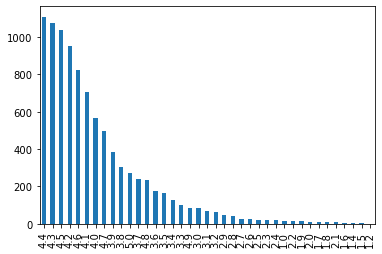

In [196]:
a['Rating'].value_counts().plot(kind="bar")

# Check the tailend of 20 dataframe

In [206]:
a.tail(20)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
10809,10809,Castle Clash: RPG War and Strategy FR,FAMILY,4.7,376223,24.000000,1000000,Free,0,Everyone
10810,10810,Fr Lupupa Sermons,BUSINESS,4.8,19,21.000000,100,Free,0,Everyone
10812,10812,Fr Agnel Pune,FAMILY,4.1,80,13.000000,1000,Free,0,Everyone
10814,10814,FR: My Secret Pets!,FAMILY,4.0,785,31.000000,50000,Free,0,Teen
10815,10815,Golden Dictionary (FR-AR),BOOKS_AND_REFERENCE,4.2,5775,4.900000,500000,Free,0,Everyone
10817,10817,HTC Sense Input - FR,TOOLS,4.0,885,8.000000,100000,Free,0,Everyone
10819,10819,Fanfic-FR,BOOKS_AND_REFERENCE,3.3,52,3.600000,5000,Free,0,Teen
10820,10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.600000,1000,Free,0,Teen
10826,10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,NaN,5000000,Free,0,Mature 17+
10827,10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13.000000,5000,Free,0,Everyone
